# Build and train KNN model

## Data preprocessing

### Importing the libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [59]:
data = pd.read_csv('Social_Network_Ads.csv')
# Spliting dataset into matrix of features and dependent variables
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Displaying the dataset

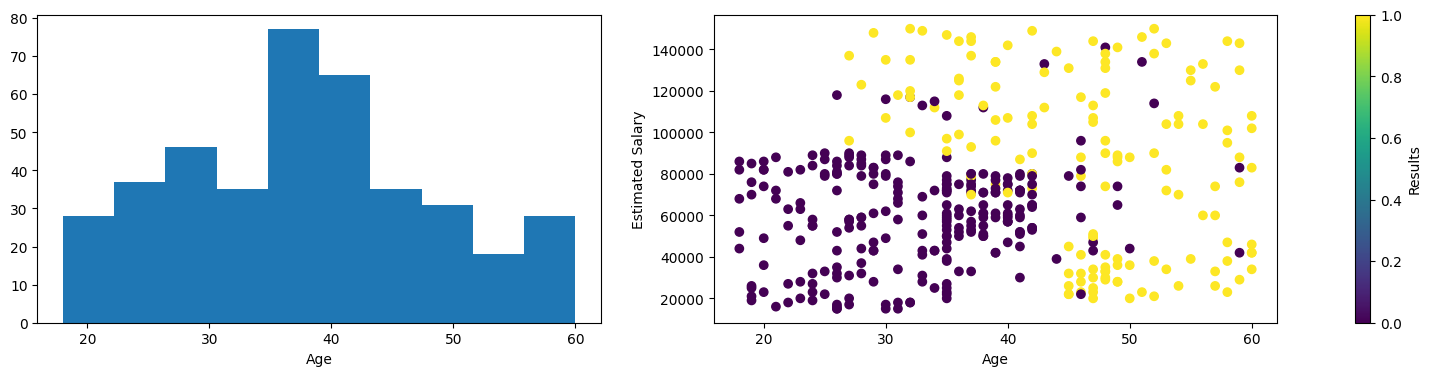

In [61]:
# diplaying it with matplolib
fig, axe = plt.subplots(1, 2, figsize=(20, 4))
axe[0].hist(x[:, 0])
axe[0].set_xlabel("Age")

sc = axe[1].scatter(x[:, 0], x[:, 1], c=y, cmap="viridis")
fig.colorbar(sc, ax=axe, label="Results")
axe[1].set_xlabel("Age")
axe[1].set_ylabel("Estimated Salary")

plt.show()

### Spliting data into training and test set

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Feature scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)
x_test_scaled[:5, :]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## Build and train the KNN model

In [64]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
neighbor_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

### Make model to predict new data ans test set

In [65]:
print(neighbor_model.predict(sc.transform([[30, 87000]])))

[0]


In [66]:
y_pred = neighbor_model.predict(x_test_scaled)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [67]:
 # Show the ground true (first column) and predicted by model (second column) in the same array
 print(np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), 1)[:10, :])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]


## Displaying the model preformance

### Confusion matrix

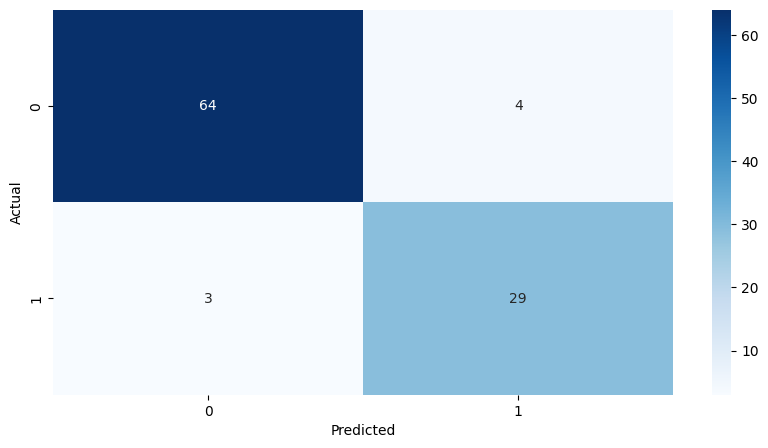

0.93

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
accuracy_score(y_test, y_pred)

### model prediction performance

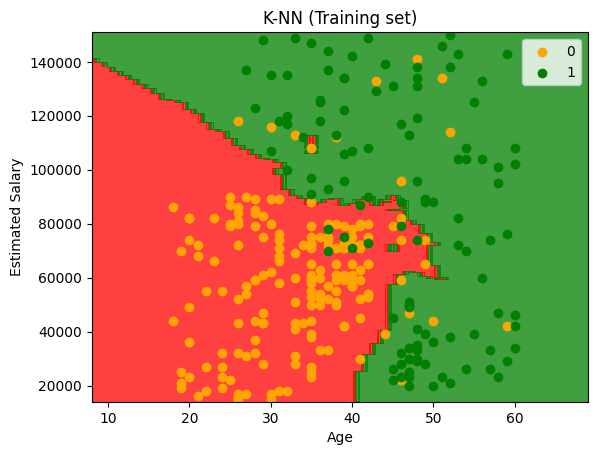

In [70]:
from ast import ListComp
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=1),
                     np.arange(start= X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step=1))
plt.contourf(X1, X2, neighbor_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('orange', 'green'))(i), label = j)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

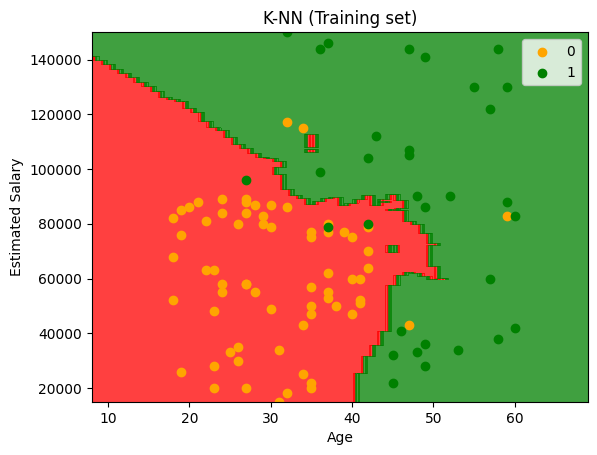

In [72]:
from ast import ListComp
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=1),
                     np.arange(start= X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step=1))
plt.contourf(X1, X2, neighbor_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('orange', 'green'))(i), label = j)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()